In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os

import scipy as sp
from scipy import stats

import string
import warnings

In [9]:
warnings.filterwarnings("ignore")

In [2]:
sns.set_theme()

Annotate subplots with R^2 and line equations

In [14]:
def annotate(data, k, i, **kws):
        r, p = sp.stats.pearsonr(data['x'], data['y'])
        slope, intercept, r_value, p_value, std_err = stats.linregress(data['x'], data['y'])
        #print((-slope)*3.3*1000/0.0347)
        axs[i].text(k[2], k[3], 'R^2 = {:.3f}\n y = {:.3f} - {:.6f}x'.format(r_value**2, intercept, -slope),
                transform=axs[i].transAxes)

176.3964264808822
139.21788054281623
163.42002749933343
67.54419466669218
40.43565724676547
22.0397348587765
17.90325799036195
28.931393210916514


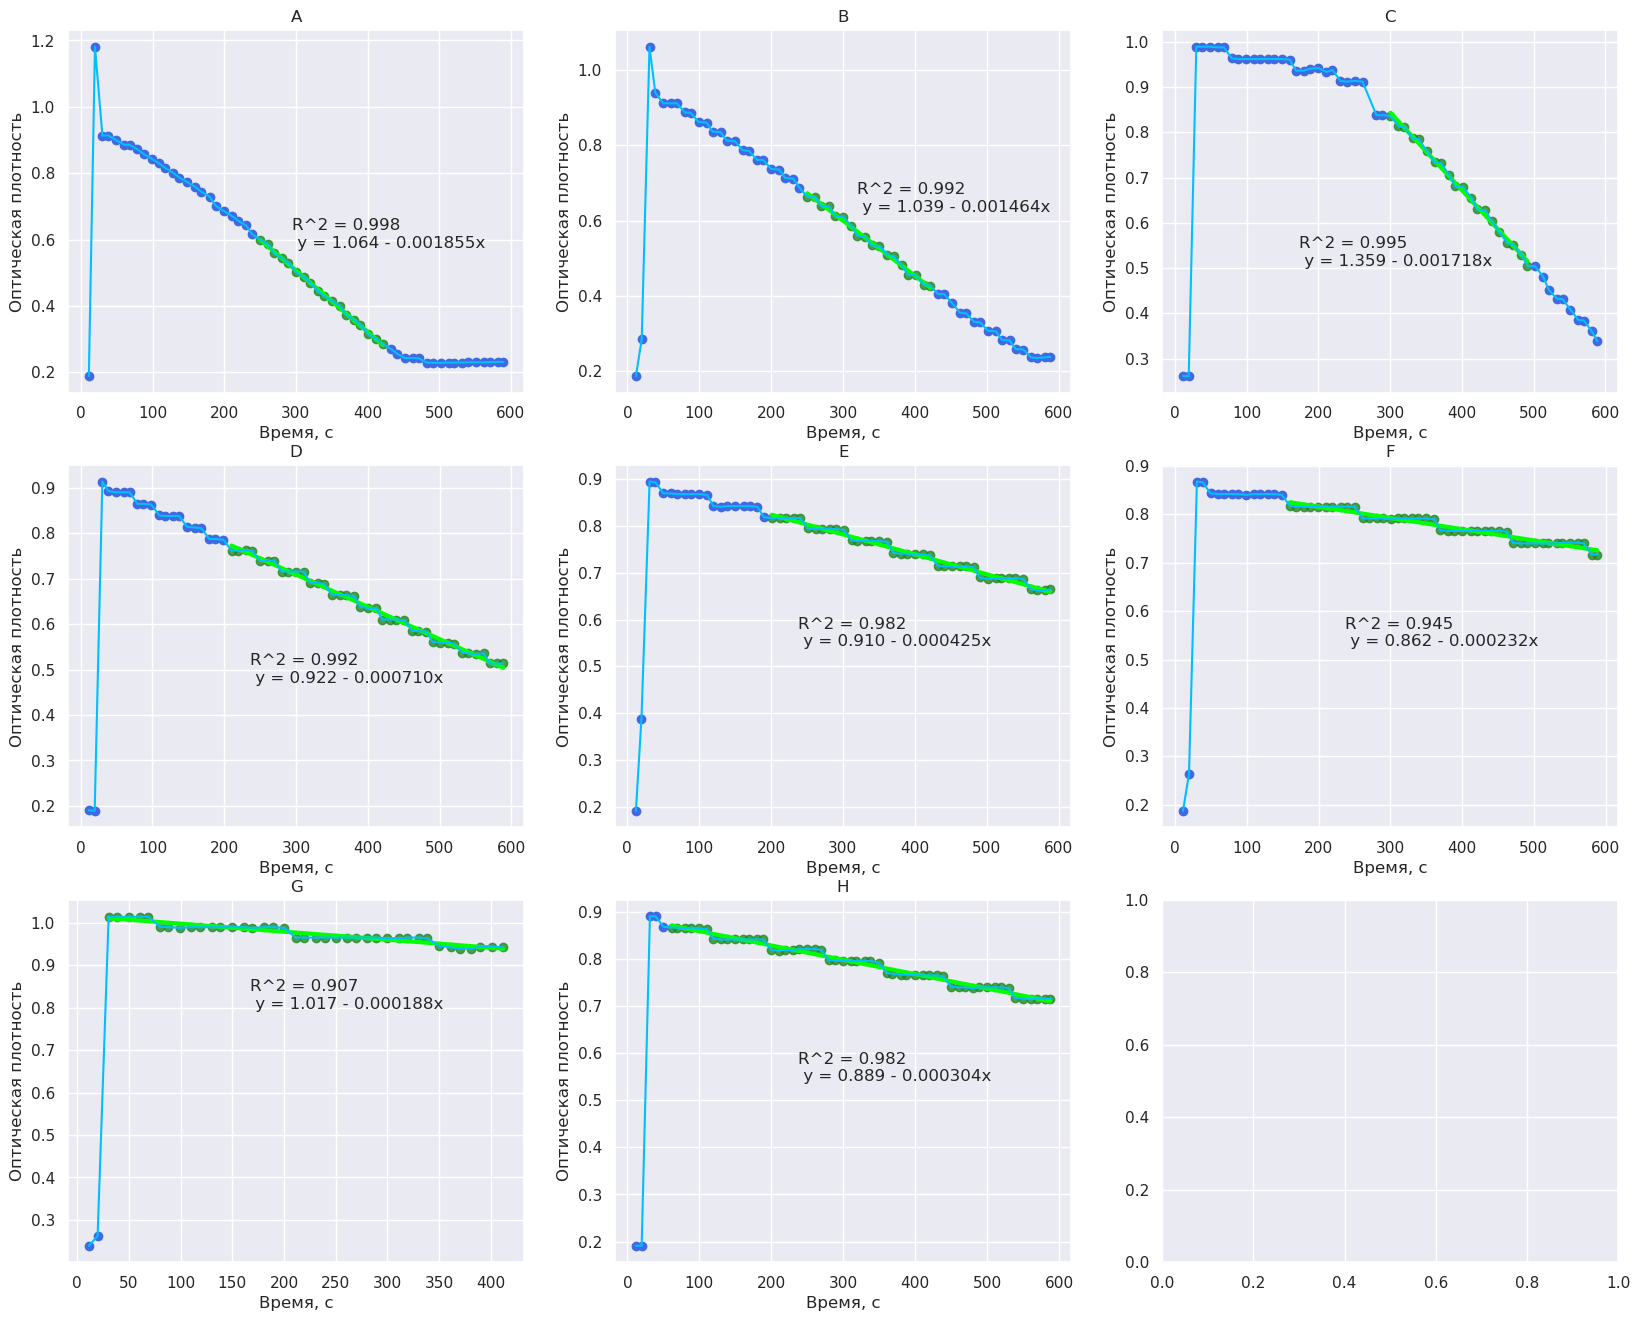

In [15]:
# [start time for linear regression, end time for linear regression, x (propotion: text start / overall length), y (propotion: text hight / overall hight)]
p = [[250, 430, .49, .4],[250, 430, .53, .5],[300, 500, .3, .35],[200, 600, .4, .4],[200, 600, .4, .5],[150, 600, .4, .5],[25, 430, .4, .7],[50, 600, .4, .5],[50, 600, .4, .5]]
f, axs = plt.subplots(3, 3, figsize=(20, 16))

axs = axs.ravel()
i = 0

directory = os.getcwd()
for root,dirs,files in os.walk(directory):
    files.sort()
    for file in files:
        if file.endswith(".csv"):

            print(str(file))

            df = pd.read_csv(file)
            sns.regplot(x='x', y='y', ax=axs[i], data=df.loc[(df.x > p[i][0]) & (df.x < p[i][1])], line_kws={'linewidth':3, 'color': 'lime'}, scatter_kws={"color": "forestgreen"})
            for index, row in df.loc[~((df.x > p[i][0]) & (df.x < p[i][1]))].iterrows():
                axs[i].scatter(x=row["x"], y=row["y"], color='royalblue')

            annotate(df.loc[(df.x > p[i][0]) & (df.x < p[i][1])], p[i], i)
            sns.lineplot(data=df, x="x", y="y", ax=axs[i], color='deepskyblue')

            axs[i].set(xlabel='Время, с', ylabel='Оптическая плотность', title=string.ascii_uppercase[i])

            i+=1

plt.show()

In [ ]:
df = pd.read_csv("1_20230915_141207.csv")

g = sns.lmplot(x='x', y='y', data=df.loc[(df.x > 250) & (df.x < 430)], line_kws={'linewidth':3, 'color': 'lime'}, scatter_kws={"color": "forestgreen"})

for index, row in df.loc[~((df.x > 250) & (df.x < 430))].iterrows():
    plt.scatter(x=row["x"], y=row["y"], color='royalblue')



def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['x'], data['y'])
    slope, intercept, r_value, p_value, std_err = stats.linregress(data['x'], data['y'])
    ax = plt.gca()
    ax.text(.55, .4, 'R^2 = {:.3f}\n y = {:.3f} + {:.3f}x'.format(r**2, intercept, slope),
            transform=ax.transAxes)
    
annotate(df)
g = sns.lineplot(data=df, x="x", y="y", color='deepskyblue')

g.set(xlabel='Время, с', ylabel='Оптическая плотность')

plt.show()